In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [44]:
import matplotlib
#matplotlib.use('nbagg')
from matplotlib import style
#style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [37]:
import datetime as dt
import pandas as pd

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [5]:
engine.execute('SELECT * FROM measurements LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70)]

In [6]:
engine.execute('SELECT * FROM stations LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [7]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [9]:
# Reflect Database into ORM classes (Station and Measurement)
Base = automap_base()
Base.prepare(engine, reflect=True)
Station = Base.classes.stations
Measurement = Base.classes.measurements

In [13]:
session = Session(engine)

## Precipitation Analysis

In [24]:
#Design a query to retrieve the last 12 months of precipitation data.

# First, get the most recent date
session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()

('2017-08-23')

In [27]:
# Most recent date in the table is 2017-08-23, so need to get previous 12 months (365 days)
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)  
print(query_date)


2016-08-23


In [46]:
# Query for last 12 months of precipitation data
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > query_date).\
    order_by(Measurement.date).all()

[('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.02), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.05), ('2016-08-31', 0.13), ('2016-08-31', 0.1), ('2016-08-31', 0.25), ('2016-08-31', 0.24), ('

<IPython.core.display.Javascript object>


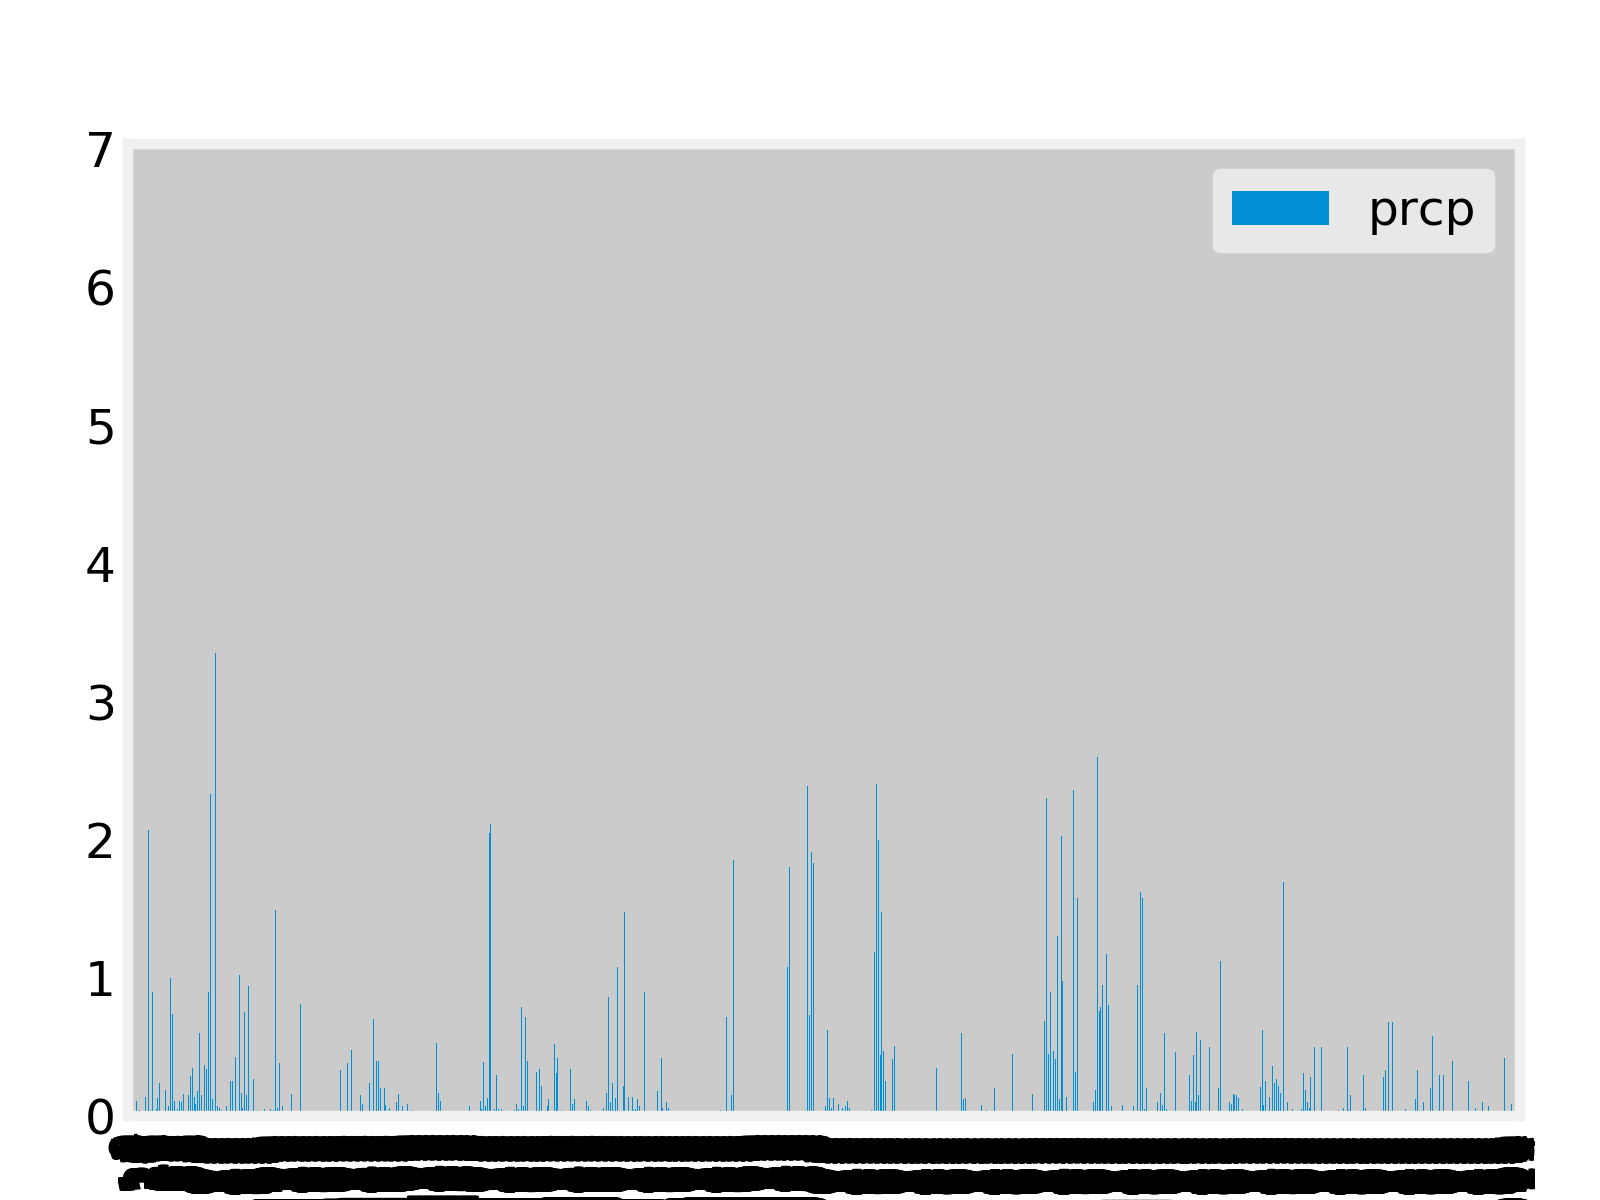

In [45]:
# Plot the Results in a Matplotlib bar chart
### BEGIN SOLUTION
df = pd.DataFrame(prcp_data, columns=['date', 'prcp'])
#df.set_index('date', inplace=True)
df.plot.bar()
#plt.tight_layout()
plt.show()
### END SOLUTION